# IT Survey Salary for EDA

## Importing dataset

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [369]:
df=pd.read_csv('./IT Salary Survey EU  2020.csv')

In [373]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


## Cleaning the data

In [374]:
# check for missing values
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

Choosing the best way to deal with null values for each column

In [375]:
median_age=df['Age'].median()
df['Age']=df['Age'].fillna(median_age)
df['Age'].isnull().sum()

0

In [376]:
df['Total years of experience'].isnull().sum()

16

In [377]:
df['Seniority level'].isnull().sum()

12

In [378]:

df=df.rename(columns = {'Total years of experience':'Experience',
                        'Years of experience in Germany':'Experience in germany',
                       'Your main technology / programming language':'Main technology',
                       'Other technologies/programming languages you use often':'Other technologies',
                       'Yearly brutto salary (without bonus and stocks) in EUR':'Yearly brutto salary',
                       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'Previous annual brutto salary if staying in same country',
                       'Annual bonus+stocks one year ago. Only answer if staying in same country':'Previous annual bonus+stocks if staying in same country',
                       'Have you lost your job due to the coronavirus outbreak?':'Losing job to outbreak',
                       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'Hours of shorter working in week',
                       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR':'additional monetary support due to Work From Home',
                       'Position ':'Position'})


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Timestamp                                                 1253 non-null   object 
 1   Age                                                       1253 non-null   float64
 2   Gender                                                    1243 non-null   object 
 3   City                                                      1253 non-null   object 
 4   Position                                                  1247 non-null   object 
 5   Experience                                                1237 non-null   object 
 6   Experience in germany                                     1221 non-null   object 
 7   Seniority level                                           1241 non-null   object 
 8   Main technology   

In [295]:
df.isnull().sum()


Timestamp                                                     0
Age                                                           0
Gender                                                       10
City                                                          0
Position                                                      6
Experience                                                   16
Experience in germany                                        32
Seniority level                                              12
Main technology                                             127
Other technologies                                          157
Yearly brutto salary                                          0
Yearly bonus + stocks in EUR                                424
Previous annual brutto salary if staying in same country    368
Previous annual bonus+stocks if staying in same country     639
Number of vacation days                                      68
Employment status                       

In [296]:
df.dropna(axis=0,subset=['Position','Gender','Experience','Experience in germany','Seniority level',
        'Employment status','Сontract duration','Company size'
        ,'Company type','Losing job to outbreak'],inplace=True)

In [381]:
df[['Yearly bonus + stocks in EUR','Previous annual brutto salary if staying in same country',
  'Previous annual bonus+stocks if staying in same country',
   'Number of vacation days',
  'Hours of shorter working in week',
  'additional monetary support due to Work From Home']]=df[['Yearly bonus + stocks in EUR','Previous annual brutto salary if staying in same country',
  'Previous annual bonus+stocks if staying in same country',
   'Number of vacation days',
  'Hours of shorter working in week',
  'additional monetary support due to Work From Home']].fillna(0)


In [382]:
df.isnull().sum()

Timestamp                                                     0
Age                                                           0
Gender                                                       10
City                                                          0
Position                                                      6
Experience                                                   16
Experience in germany                                        32
Seniority level                                              12
Main technology                                             127
Other technologies                                          157
Yearly brutto salary                                          0
Yearly bonus + stocks in EUR                                  0
Previous annual brutto salary if staying in same country      0
Previous annual bonus+stocks if staying in same country       0
Number of vacation days                                       0
Employment status                       

In [383]:
df=df.drop(axis=1,columns=['Main technology','Other technologies'])

## Incoherent values

Taking care of outliers in numerical values. we saw in .info() that some numerical values are cinsidered objects . It needs to be fixed.

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Timestamp                                                 1253 non-null   object 
 1   Age                                                       1253 non-null   float64
 2   Gender                                                    1243 non-null   object 
 3   City                                                      1253 non-null   object 
 4   Position                                                  1247 non-null   object 
 5   Experience                                                1237 non-null   object 
 6   Experience in germany                                     1221 non-null   object 
 7   Seniority level                                           1241 non-null   object 
 8   Yearly brutto sala

In [385]:
df['Experience'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '6 (not as a data scientist, but as a lab scientist)', '383',
       '3.5', 'less than year'], dtype=object)

In [386]:
#Replacing Incoherent and false numerical values
df['Experience'] = df['Experience'].replace(['1 (as QA Engineer) / 11 in total','15, thereof 8 as CTO','6 (not as a data scientist, but as a lab scientist)','less than year','1,5','2,5'],
                                            ['11','15','6','0.5','1.5','2.5'])
df['Experience in germany'] = df['Experience in germany'].replace(['< 1','4 (in Switzerland), 0 (in Germany)','4 month','3 months','3 (in Poland)','<1','⁰','-','6 (not as a data scientist, but as a lab scientist)','less than year','4,5','1,7','3,5','0,5','0,3','1,5','2,5'],
                                                                  ['0.5','0','0.5','0.2','0','0.5','0','0','6','0.5','4.5','1.7','3.5','0.5','0.3','1.5','2.5'])
df['Yearly bonus + stocks in EUR'] = df['Yearly bonus + stocks in EUR'].replace(['bvg only','depends','15000+-','Na','-','Not sure'],
                                              ['0','45000','15000','0','0','0'])
df['Previous annual bonus+stocks if staying in same country'] = df['Previous annual bonus+stocks if staying in same country'].replace(['learning budget, bvg, gym, food','-'],
                                                                                                                                      ['0','0'])
df['Number of vacation days'] = df['Number of vacation days'].replace(['unlimited','(no idea)','unlimited ','30 in contract (but theoretically unlimited)','Unlimited ','~25','23+','Unlimited','24 labour days','37.5'],
                                                                      ['20','20','20','30','30','25','23','30','24','38'])  
df['additional monetary support due to Work From Home'] = df['additional monetary support due to Work From Home'].replace(['No','180€','400 / month','yes','75% from government ','40 every month','200 Amazon voucher','-','20%','1250.29','I was able to move all equipment I need to work to home','0,00','no','600 nett'],
                                                                                                                          ['0','180','4800','580','1300','480','200','0','240','1250','0','0','0','600'])

In [387]:
df['Experience'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '24', '0', '4.5', '27', '31', '383', '3.5',
       '0.5'], dtype=object)

The features above are all stated as object type, we need to transforme them to float

In [388]:
df[['Experience','Experience in germany',
   'Yearly bonus + stocks in EUR',
  'Previous annual bonus+stocks if staying in same country',
  'Number of vacation days',
  'additional monetary support due to Work From Home']]=df[['Experience','Experience in germany',
   'Yearly bonus + stocks in EUR',
  'Previous annual bonus+stocks if staying in same country',
  'Number of vacation days',
  'additional monetary support due to Work From Home']].astype(float, errors = 'raise')


In [389]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1253.0,3.249880e+01,5.602890e+00,20.0,29.0,32.0,35.0,6.900000e+01
Experience,1237.0,9.057478e+00,1.187709e+01,0.0,5.0,8.0,12.0,3.830000e+02
Experience in germany,1221.0,3.704914e+00,3.639790e+00,0.0,1.0,3.0,5.0,3.000000e+01
Yearly brutto salary,1253.0,8.027904e+07,2.825061e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
Yearly bonus + stocks in EUR,1253.0,4.004616e+06,1.412516e+08,0.0,0.0,0.0,10000.0,5.000000e+09
Previous annual brutto salary if staying in same country,1253.0,4.465583e+05,1.412391e+07,0.0,0.0,57000.0,72000.0,5.000000e+08
Previous annual bonus+stocks if staying in same country,1253.0,5.040341e+04,1.412457e+06,0.0,0.0,0.0,5000.0,5.000000e+07
Number of vacation days,1253.0,2.676536e+01,1.224024e+01,0.0,26.0,28.0,30.0,3.650000e+02
Hours of shorter working in week,1253.0,3.860335e+00,1.022323e+01,0.0,0.0,0.0,0.0,4.000000e+01
additional monetary support due to Work From Home,1253.0,1.626712e+02,5.582798e+02,0.0,0.0,0.0,0.0,1.000000e+04


We also need to make sure that cathegorical values don't have incoherent values

In [305]:
df.drop(df[df['Gender'] == 'Diverse'].index, inplace = True)
df['Employment status']=df['Employment status'].replace(['Self-employed (freelancer)','working student','Working Student','Full-time position, part-time position, & self-employed (freelancing, tutoring)',"full-time, but 32 hours per week (it was my request, I'm a student)",'Werkstudent'],
                                                        ['freelancer','Part-time employee','Part-time employee','Full-time employee','Full-time employee','Part-time employee'])
df['Сontract duration']=df['Сontract duration'].replace(['0'],['none'])
df['Main language at work']=df['Main language at work'].replace(['English and German','Русский','Deuglisch','both','Russian, English'],
                                                                ['English','Russian','Dutch','English','Russian'])
df['Losing job to outbreak']=df['Losing job to outbreak'].replace(["i didn't but will be looking for new one because of covid",'kurzarbeitzeit for 1.5 months','Have been a freelancer at the beginning of year','No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months','Lost the job but for different reason','Leads and project inquiries have slowed down','Laid off for a bit','yes but found a new one with better pay / perks'],
                                                                  ['No','No','No','No','No','No','Yes','Yes'])

## Outliers

In [306]:
def detect_outliers(data):    #Create a function that detects Outliers
    outliers=[]
    threshold = 3
    mean = np.mean(data)
    std  = np.std(data)  
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(data.index[data==i].tolist())
            
    
    return outliers

detect_outliers(df['Age'])

[[23],
 [59],
 [232, 1159],
 [233],
 [296],
 [403],
 [673],
 [955, 1182],
 [232, 1159],
 [955, 1182]]

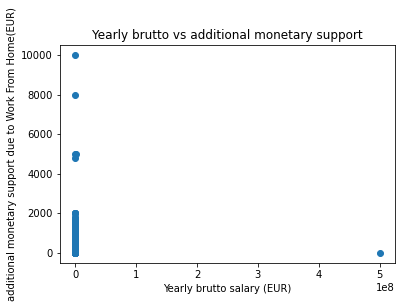

In [307]:
ax = plt.axes()

ax.scatter(df['Yearly brutto salary'], df['additional monetary support due to Work From Home'])

# Label the axes
ax.set(xlabel='Yearly brutto salary (EUR)',
       ylabel='additional monetary support due to Work From Home(EUR)',
       title='Yearly brutto vs additional monetary support');

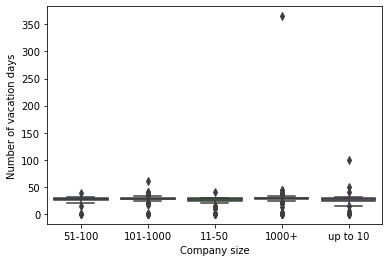

In [308]:
#Boxplot
ax = sns.boxplot( x="Company size",y="Number of vacation days" ,data=df)

In [309]:
df.corr()

,Age,Experience,Experience in germany,Yearly brutto salary,Yearly bonus + stocks in EUR,Previous annual brutto salary if staying in same country,Previous annual bonus+stocks if staying in same country,Number of vacation days,Hours of shorter working in week,additional monetary support due to Work From Home
Age,1.000000,0.714060,0.537246,-0.018319,-0.018746,-0.018152,-0.017118,0.028327,0.035705,0.033159
Experience,0.714060,1.000000,0.506415,-0.042858,-0.043508,-0.042827,-0.041711,0.023324,0.015668,0.060652
Experience in germany,0.537246,0.506415,1.000000,-0.021752,-0.022194,-0.021374,-0.020637,0.051256,0.015249,0.025221
Yearly brutto salary,-0.018319,-0.042858,-0.021752,1.000000,0.999998,0.999996,0.999849,0.175982,-0.011306,-0.008129
Yearly bonus + stocks in EUR,-0.018746,-0.043508,-0.022194,0.999998,1.000000,0.999996,0.999844,0.175867,-0.011212,-0.008605
Previous annual brutto salary if staying in same country,-0.018152,-0.042827,-0.021374,0.999996,0.999996,1.000000,0.999852,0.175985,-0.011122,-0.008487
Previous annual bonus+stocks if staying in same country,-0.017118,-0.041711,-0.020637,0.999849,0.999844,0.999852,1.000000,0.176301,-0.011104,-0.006843
Number of vacation days,0.028327,0.023324,0.051256,0.175982,0.175867,0.175985,0.176301,1.000000,0.012631,0.043523
Hours of shorter working in week,0.035705,0.015668,0.015249,-0.011306,-0.011212,-0.011122,-0.011104,0.012631,1.000000,0.013450
additional monetary support due to Work From Home,0.033159,0.060652,0.025221,-0.008129,-0.008605,-0.008487,-0.006843,0.043523,0.013450,1.000000


# Features

## Feature Transformation

I did a scaling of my numeric vales to have a better visualization

In [310]:
df=df.reset_index(drop=True)
df

,Timestamp,Age,Gender,City,Position,Experience,Experience in germany,Seniority level,Yearly brutto salary,Yearly bonus + stocks in EUR,...,Previous annual bonus+stocks if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Losing job to outbreak,Hours of shorter working in week,additional monetary support due to Work From Home
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,80000.0,5000.0,...,10000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,No,0.0,0.0
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,80000.0,0.0,...,5000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0.0
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,120000.0,120000.0,...,100000.0,30.0,freelancer,Temporary contract,English,101-1000,Product,Yes,0.0,0.0
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,54000.0,0.0,...,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup,No,0.0,0.0
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,62000.0,0.0,...,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9.0,5.0,Senior,70000.0,72000.0,...,72000.0,26.0,Full-time employee,Unlimited contract,English,51-100,Product,Yes,0.0,0.0
1150,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,1.5,Senior,60000.0,3000.0,...,2500.0,20.0,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,0.0
1151,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15.0,2.0,Lead,110000.0,0.0,...,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,0.0,0.0
1152,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7.0,7.0,Middle,38350.0,40950.0,...,36400.0,27.0,Full-time employee,Unlimited contract,German,101-1000,Product,No,0.0,0.0


In [311]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled= std_scaler.fit_transform(df.select_dtypes('float64').to_numpy())
df_scaled= pd.DataFrame(df_scaled, columns=df.select_dtypes('float64').columns)
df['Age']=df_scaled['Age']
df['Experience']=df_scaled['Experience']
df['Experience in germany']=df_scaled['Experience in germany']
df['Yearly brutto salary']=df_scaled['Yearly brutto salary']
df['Yearly bonus + stocks in EUR']=df_scaled['Yearly bonus + stocks in EUR']
df['Previous annual brutto salary if staying in same country']=df_scaled['Previous annual brutto salary if staying in same country']
df['Previous annual bonus+stocks if staying in same country']=df_scaled['Previous annual bonus+stocks if staying in same country']
df['Number of vacation days']=df_scaled['Number of vacation days']
df['Hours of shorter working in week']=df_scaled['Hours of shorter working in week']
df['additional monetary support due to Work From Home']=df_scaled['additional monetary support due to Work From Home']
df

,Timestamp,Age,Gender,City,Position,Experience,Experience in germany,Seniority level,Yearly brutto salary,Yearly bonus + stocks in EUR,...,Previous annual bonus+stocks if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Losing job to outbreak,Hours of shorter working in week,additional monetary support due to Work From Home
0,24/11/2020 11:14:15,-1.181535,Male,Munich,Software Engineer,-0.719704,-0.187570,Senior,-0.028866,-0.029515,...,-0.030041,0.219439,Full-time employee,Unlimited contract,English,51-100,Product,No,-0.380642,-0.293009
1,24/11/2020 11:14:16,-1.181535,Male,Berlin,Backend Developer,-0.340558,0.095675,Senior,-0.028866,-0.029549,...,-0.033439,0.052729,Full-time employee,Unlimited contract,English,101-1000,Product,No,-0.380642,-0.293009
2,24/11/2020 11:14:21,-0.636937,Male,Berlin,Software Engineer,0.607307,0.662165,Lead,-0.026146,-0.028733,...,0.031137,0.219439,freelancer,Temporary contract,English,101-1000,Product,Yes,-0.380642,-0.293009
3,24/11/2020 11:15:24,-0.818470,Male,Berlin,Frontend Developer,-0.909277,-0.754060,Junior,-0.030633,-0.029549,...,-0.036838,-0.280691,Full-time employee,Unlimited contract,English,51-100,Startup,No,-0.380642,-0.293009
4,24/11/2020 11:15:46,0.815324,Male,Berlin,Backend Developer,1.555172,0.662165,Senior,-0.030089,-0.029549,...,-0.036838,0.136084,Full-time employee,Unlimited contract,English,101-1000,Product,No,-0.380642,-0.293009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,18/01/2021 15:05:50,-0.273872,Male,Berlin,Backend Developer,0.038588,0.378920,Senior,-0.029545,-0.029059,...,0.012104,-0.113981,Full-time employee,Unlimited contract,English,51-100,Product,Yes,-0.380642,-0.293009
1150,18/01/2021 17:46:02,0.089193,Male,Berlin,Researcher/ Consumer Insights Analyst,0.228161,-0.612438,Senior,-0.030225,-0.029528,...,-0.035139,-0.614110,Full-time employee,Unlimited contract,English,1000+,Product,No,-0.380642,-0.293009
1151,18/01/2021 23:20:35,1.178389,Male,Munich,IT Operations Manager,1.176026,-0.470815,Lead,-0.026826,-0.029549,...,-0.036838,0.052729,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,-0.380642,-0.293009
1152,19/01/2021 10:17:58,-1.181535,Male,Saarbrücken,Frontend Developer,-0.340558,0.945410,Middle,-0.031697,-0.029271,...,-0.012095,-0.030626,Full-time employee,Unlimited contract,German,101-1000,Product,No,-0.380642,-0.293009


In [312]:
df_encoded=pd.get_dummies(df[['Gender','Employment status','Сontract duration','Main language at work','Company size','Losing job to outbreak']])
df_encoded

,Gender_Female,Gender_Male,Employment status_Founder,Employment status_Full-time employee,Employment status_Intern,Employment status_Part-time employee,Employment status_freelancer,Сontract duration_Temporary contract,Сontract duration_Unlimited contract,Сontract duration_none,...,Main language at work_Polish,Main language at work_Russian,Main language at work_Spanish,Company size_1000+,Company size_101-1000,Company size_11-50,Company size_51-100,Company size_up to 10,Losing job to outbreak_No,Losing job to outbreak_Yes
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1150,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1151,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1152,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [313]:
data=df.copy()
df=df.drop(['Gender','Employment status','Сontract duration','Main language at work','Company size','Losing job to outbreak'],axis=1)
df_final=pd.concat([df, df_encoded], axis=1)

# hypothesis

## 1- Male and women have equal salaries

In [314]:
female=df_final[df_final.Gender_Female==1]
male=df_final[df_final.Gender_Male==1]
male

,Timestamp,Age,City,Position,Experience,Experience in germany,Seniority level,Yearly brutto salary,Yearly bonus + stocks in EUR,Previous annual brutto salary if staying in same country,...,Main language at work_Polish,Main language at work_Russian,Main language at work_Spanish,Company size_1000+,Company size_101-1000,Company size_11-50,Company size_51-100,Company size_up to 10,Losing job to outbreak_No,Losing job to outbreak_Yes
0,24/11/2020 11:14:15,-1.181535,Munich,Software Engineer,-0.719704,-0.187570,Senior,-0.028866,-0.029515,-0.027680,...,0,0,0,0,0,0,1,0,1,0
1,24/11/2020 11:14:16,-1.181535,Berlin,Backend Developer,-0.340558,0.095675,Senior,-0.028866,-0.029549,-0.027205,...,0,0,0,0,1,0,0,0,1,0
2,24/11/2020 11:14:21,-0.636937,Berlin,Software Engineer,0.607307,0.662165,Lead,-0.026146,-0.028733,-0.025981,...,0,0,0,0,1,0,0,0,0,1
3,24/11/2020 11:15:24,-0.818470,Berlin,Frontend Developer,-0.909277,-0.754060,Junior,-0.030633,-0.029549,-0.032779,...,0,0,0,0,0,0,1,0,1,0
4,24/11/2020 11:15:46,0.815324,Berlin,Backend Developer,1.555172,0.662165,Senior,-0.030089,-0.029549,-0.028564,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,18/01/2021 15:05:50,-0.273872,Berlin,Backend Developer,0.038588,0.378920,Senior,-0.029545,-0.029059,-0.028020,...,0,0,0,0,0,0,1,0,0,1
1150,18/01/2021 17:46:02,0.089193,Berlin,Researcher/ Consumer Insights Analyst,0.228161,-0.612438,Senior,-0.030225,-0.029528,-0.029516,...,0,0,0,1,0,0,0,0,1,0
1151,18/01/2021 23:20:35,1.178389,Munich,IT Operations Manager,1.176026,-0.470815,Lead,-0.026826,-0.029549,-0.026661,...,0,0,0,0,1,0,0,0,1,0
1152,19/01/2021 10:17:58,-1.181535,Saarbrücken,Frontend Developer,-0.340558,0.945410,Middle,-0.031697,-0.029271,-0.030481,...,0,0,0,0,1,0,0,0,1,0


In [315]:
f_salary = female['Yearly brutto salary']
m_salary = male['Yearly brutto salary']
f_salary

10     -0.030735
30     -0.031245
34     -0.031245
43     -0.030225
45     -0.029545
          ...   
1103   -0.031177
1114   -0.031075
1119   -0.033195
1122   -0.030388
1139   -0.030225
Name: Yearly brutto salary, Length: 179, dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly brutto salary', ylabel='Density'>

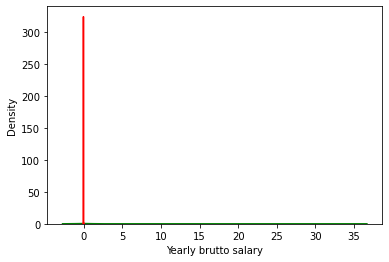

In [316]:
sns.distplot(f_salary,color='green',hist=False)
sns.distplot(m_salary,color='red',hist=False)

In [317]:
print(f_salary.mean(),m_salary.mean())

0.15950915466808754 -0.029284244805731025


In [318]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(m_salary, f_salary)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -2.3251595261942617 , p_value1 =  0.020236453085092483


In [319]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between salary of females and salary of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between salary of females and salary of males.")

Conclusion: since p_value 0.020236453085092483 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between salary of females and salary of males.


[Text(0.5, 1.0, 'Fig:1 loosing job vs Experience')]

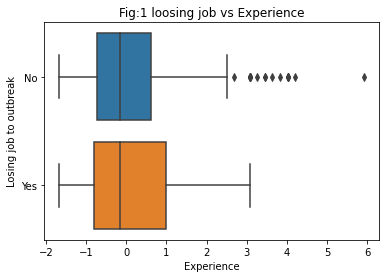

In [321]:
sns.boxplot(x=data.Experience,y=data['Losing job to outbreak'],data=data).set(title="Fig:1 loosing job vs Experience")

In [332]:
loosing_job = data.loc[data['Losing job to outbreak']=="Yes"]
loose_exp = loosing_job.Experience
lexp_mean = loose_exp.mean()
lexp_mean

0.0932108718401762

In [333]:
keeping_job = data.loc[data['Losing job to outbreak']=="No"]
keep_exp = keeping_job.Experience
kexp_mean = keep_exp.mean()
kexp_mean

-0.005022320948465989

In [334]:
t_val2, p_value2 = stats.ttest_ind(loose_exp,keep_exp )
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 0.7345365890279889 , p_value =0.4627712541203487 , p_value_onetail = 0.23138562706017435


In [336]:
if p_value2 <alpha :
  print("Conclusion:Since p_value {} is less than alpha {} ". format (p_value_onetail,alpha) )
  print("Reject null hypothesis that  The average of Experience is less or equal to people who lost their job.")


else:
  print("Conclusion:Since p value {} is greater than alpha {} ". format (p_value_onetail,alpha))
  print("Failed to reject null hypothesis that The average of Experience is greater to people who lost their job.")

Conclusion:Since p value 0.23138562706017435 is greater than alpha 0.05 
Failed to reject null hypothesis that The average of Experience is greater to people who lost their job.


In [340]:
a=data.groupby([data['Company size']]).mean()

In [341]:
a['Yearly bonus + stocks in EUR']

Company size
1000+      -0.029404
101-1000   -0.029475
11-50      -0.029479
51-100     -0.029489
up to 10    0.588475
Name: Yearly bonus + stocks in EUR, dtype: float64

[[265, 412, 531, 688, 894],
 [265, 412, 531, 688, 894],
 [521],
 [265, 412, 531, 688, 894],
 [584],
 [265, 412, 531, 688, 894],
 [265, 412, 531, 688, 894],
 [920]]

In [353]:
data=data.drop([265, 412, 531, 688, 894,920,521,584],axis=0)


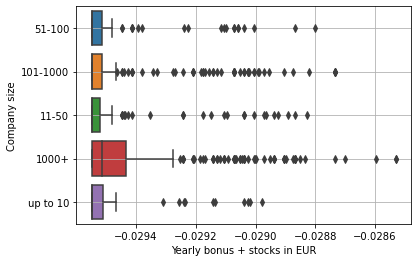

In [354]:
sns.boxplot(y="Company size", x="Yearly bonus + stocks in EUR", data=data)
plt.grid()
plt.show()

In [367]:
data1=data.copy()
data1=data1.rename(columns={'Yearly bonus + stocks in EUR':'Yearly_bonus','Company size':'Company_size'})
from statsmodels.stats.anova import anova_lm 
from statsmodels.formula.api import ols
formula = 'Yearly_bonus ~ C(Company_size)'
model = ols(formula, data1).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Company_size),4.0,6.263790e-07,1.565947e-07,5.322521,0.000301
Residual,1140.0,3.354012e-05,2.942116e-08,NaN,NaN


In [390]:
data.skew()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8908\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Age                                                          1.121143
Experience                                                   1.142203
Experience in germany                                        2.572404
Yearly brutto salary                                        14.075822
Yearly bonus + stocks in EUR                                 2.562730
Previous annual brutto salary if staying in same country     4.937690
Previous annual bonus+stocks if staying in same country      2.647305
Number of vacation days                                     19.975279
Hours of shorter working in week                             2.444192
additional monetary support due to Work From Home            9.698606
dtype: float64

In [391]:
df.skew()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8908\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age                                                          1.255260
Experience                                                  25.372253
Experience in germany                                        2.642230
Yearly brutto salary                                        35.396415
Yearly bonus + stocks in EUR                                35.397735
Previous annual brutto salary if staying in same country    35.397302
Previous annual bonus+stocks if staying in same country     35.380139
Number of vacation days                                     16.457830
Hours of shorter working in week                             2.479383
additional monetary support due to Work From Home            9.201399
dtype: float64